<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# Tutorial 3<a id='top'></a>

- <a href='#section1'>3.1 A Basic Scatterplot</a>
- <a href='#section2'>3.2 Draw two sets of scatterplots in same plot</a>
- <a href='#section3'>3.3 Draw 2 scatterplots in different panels</a>
- <a href='#section4'>3.4 Object Oriented Syntax vs Matlab like Syntax</a>
- <a href='#section5'>3.5 Modify the Axis Ticks Positions and Labels</a>
- <a href='#section6'>3.6 Understanding the Plot Styles</a>
- <a href='#section7'>3.7 Customise the Legend</a>
<!-- - <a href='#section8'>3.8 Add Texts, Arrows and Annotations</a> -->
<!-- - <a href='#section9'>3.9 Customize matplotlib’s subplots layout</a> -->
- <a href='#section10'>3.10 Scatterplot drawn from `plt.scatter`</a>
- <a href='#section11'>3.11 Draw Histograms, Boxplots and Time Series</a>
<!-- - <a href='#section12'>3.12 Plot with two Y-Axis</a> -->
<!-- - <a href='#section13'>3.13 Introduction to Seaborn </a> -->
<!--  -->

# 3.1 A Basic Scatterplot<a id='section1'></a>

The following piece of code is found in pretty much any python code that has matplotlib plots.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
# this is a magic command, that tells jupyter notebook to display plots directly in the notebook, 
# instead of opening a new window for each plot.

Matplotlib is building the font cache; this may take a moment.


`matplotlib.pyplot` is usually imported as plt. It is the core object that contains the methods to create all sorts of charts and features in a plot.

The `%matplotlib inline` is a jupyter notebook specific command that let’s you see the plots in the notbook itself.

Let’s begin by making a simple but full-featured scatterplot and take it from there. Let’s see what `plt.plot()` creates if you an arbitrary sequence of numbers.

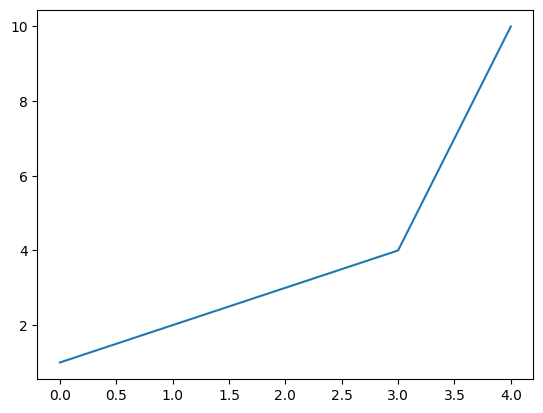

In [2]:
# Plot
plt.plot([1,2,3,4,10])

# If inputting a single list of values, the values are taken as the y-values, 
# and the x-values are taken as the indices of the list.

So how to draw a scatterplot instead?

Well to do that, let’s understand a bit more about what arguments `plt.plot()` expects. The `plt.plot` accepts 3 basic arguments in the following order: $\textbf{(x, y, format)}$.

This format is a short hand combination of `{color}{marker}{line}`.

For example, the format `'go-'` has 3 characters standing for: ‘green colored dots with solid line’. By omitting the line part (‘-‘) in the end, you will be left with only green dots (‘go’), which makes it draw a scatterplot.

Few commonly used short hand format examples are:
* `'r*--'` : ‘red stars with dashed lines’
* `'ks.'` : ‘black squares with dotted line’ (‘k’ stands for black)
* `'bD-.'` : ‘blue diamonds with dash-dot line’.

For a complete list of colors, markers and linestyles, check out the `help(plt.plot)` command.

Let’s draw a scaterplot with greendots.

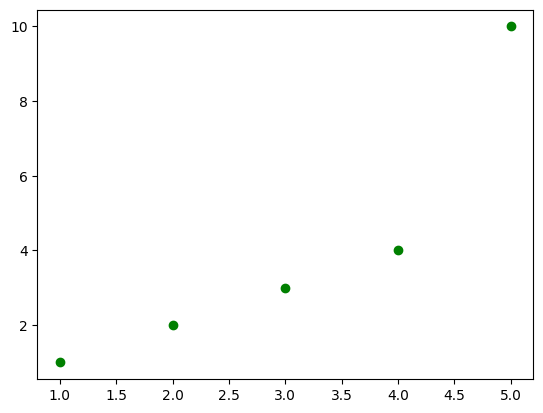

In [3]:
# matplotlab uses the following styling syntax:
# 1. color: b (blue), g (green), r (red), c (cyan), m (magenta), y (yellow), k (black), w (white)
# 2. marker: o (circle), + (plus), * (star), s (square), . (point), 1 (tri_down), 2 (tri_up), 3 (tri_left), 4 (tri_right),
# 3. line: - (solid line), -- (dashed line), -. (dash-dot line), : (dotted line), None (no line)
plt.plot([1,2,3,4,5], [1,2,3,4,10], 'go')
plt.show()

<a href='#top'>jump to the top</a>

# 3.2 Draw two sets of scatterplots in same plot<a id='section2'></a>

Now how to plot another set of 5 points of different color in the same figure?

Simply call `plt.plot()` again, it will add those point to the same picture.


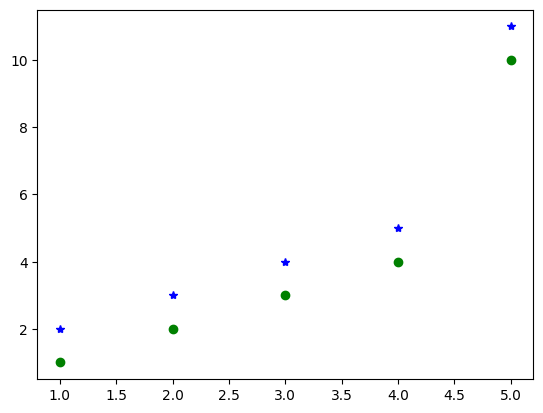

In [4]:
# Draw two sets of points
plt.plot([1,2,3,4,5], [1,2,3,4,10], 'go')  # green dots
plt.plot([1,2,3,4,5], [2,3,4,5,11], 'b*')  # blue stars
plt.show()

Now let’s add the basic plot features: Title, Legend, X and Y axis labels. How to do that?

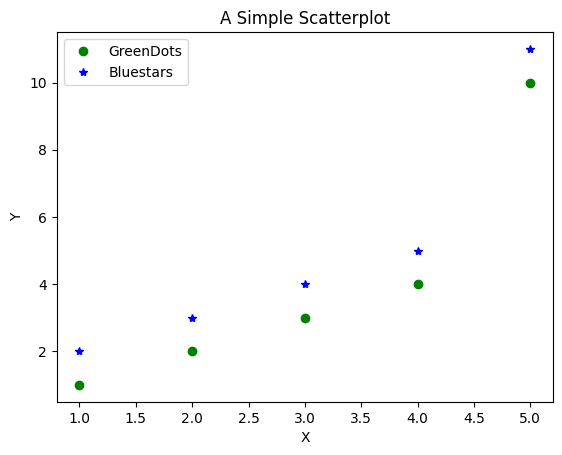

In [5]:
# Add title and axis labels
# Add legend
# Add grid
# `loc` parameter in `legend` function: 
# 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
# 'best': it means that matplotlib will try to place the legend in a location that overlaps the least with data points.

plt.plot([1,2,3,4,5], [1,2,3,4,10], 'go', label='GreenDots')
plt.plot([1,2,3,4,5], [2,3,4,5,11], 'b*', label='Bluestars')
plt.title('A Simple Scatterplot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')  # legend text comes from the plot's label parameter.
plt.show()

Now, how to increase the size of the plot? (The above plot would actually look small on a jupyter notebook)

The easy way to do it is by setting the figsize inside `plt.figure()` method.

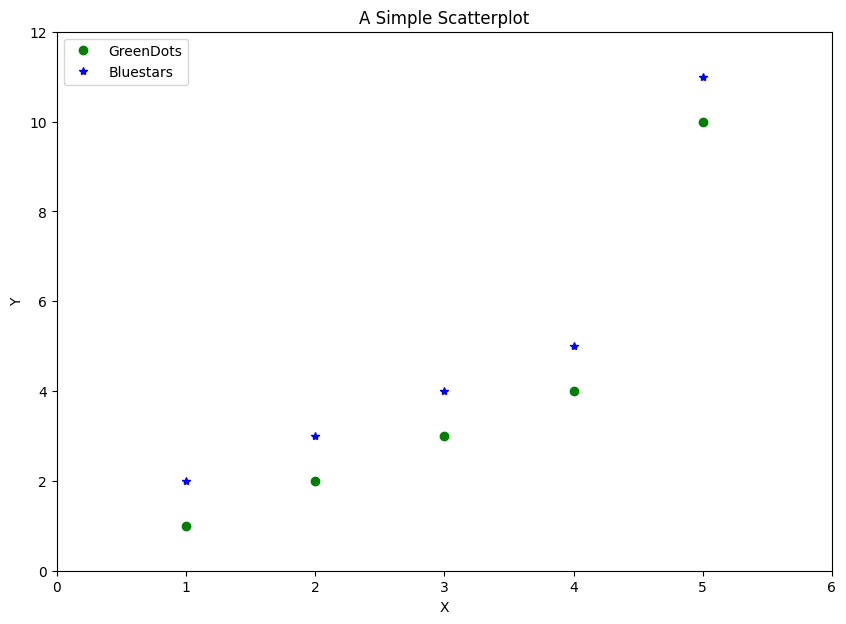

In [6]:
# `plt.figure()`: create a new figure, figsize is a tuple of the width and height of the figure in inches.
plt.figure(figsize=(10,7)) # 10 is width, 7 is height
# If we don't create a figure, it would interact with the current figure implicitly.
# We can also assign the result of `plt.figure()` to a variable, 
# and use it later. That is called reference / handle / explicit figure.

plt.plot([1,2,3,4,5], [1,2,3,4,10], 'go', label='GreenDots')  # green dots
plt.plot([1,2,3,4,5], [2,3,4,5,11], 'b*', label='Bluestars')  # blue stars
plt.title('A Simple Scatterplot')  
plt.xlabel('X')
plt.ylabel('Y')

# `plt.xlim()` and `plt.ylim()`: set the limits of the x and y axes, respectively.
plt.xlim(0, 6)
plt.ylim(0, 12)
plt.legend(loc='best')
plt.show()

<a href='#top'>jump to the top</a>

# 3.3 Draw 2 scatterplots in different panels<a id='section3'></a>

Let’s understand `figure` and `axes` in little more detail.

Suppose, I want to draw our two sets of points (green rounds and blue stars) in two separate plots side-by-side instead of the same plot. How would you do that?

You can do that by creating two separate subplots, aka, axes using `plt.subplots(1, 2)`. This creates and returns two objects:
* the figure
* the axes (subplots) inside the figure

<img src= "https://www.machinelearningplus.com/wp-content/uploads/2019/01/99_matplotlib_structure-1.png" width="300">

Previously, we called `plt.plot()` to draw the points. Since there was only one axes by default, it drew the points on that axes itself.

But now, since you want the points drawn on different subplots (axes), you have to call the plot function in the respective axes (`ax1` and `ax2` in below code) instead of `plt`.

Notice in below code, we call `ax1.plot()` and `ax2.plot()` instead of calling `plt.plot()` twice.

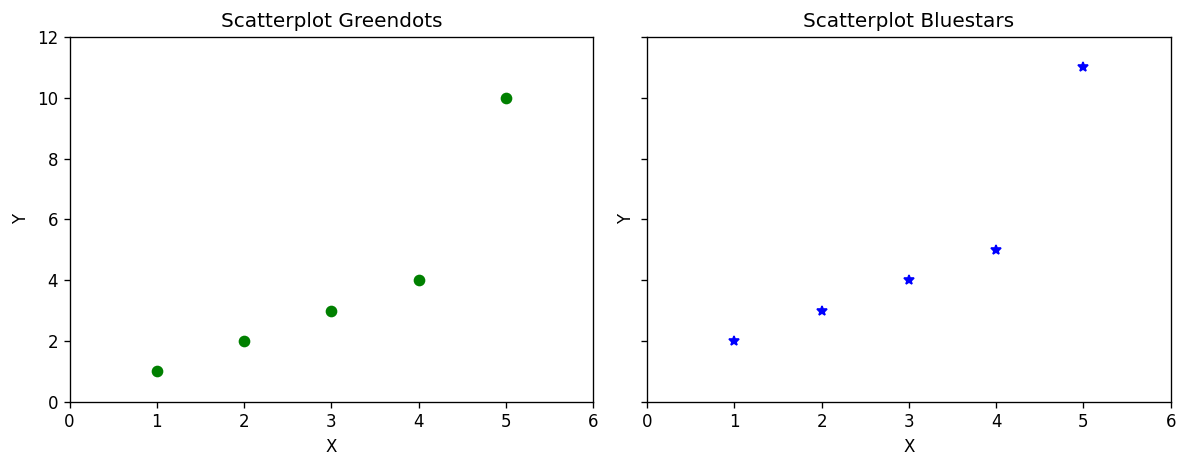

In [7]:
# Create sharey Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)
# fig: the entire figure, ax1: the first subplot, ax2: the second subplot
# subplots: 1,2: 1 row, 2 columns
# figsize: the width and height of the entire figure in incehes
# sharey: it means two plots will share the y-axis.
#dpi: affect the quality of the rendered image. 

# Plot
ax1.plot([1,2,3,4,5], [1,2,3,4,10], 'go')  # greendots
ax2.plot([1,2,3,4,5], [2,3,4,5,11], 'b*')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Scatterplot Greendots'); ax2.set_title('Scatterplot Bluestars')
ax1.set_xlabel('X');  ax2.set_xlabel('X')  # x label
ax1.set_ylabel('Y');  ax2.set_ylabel('Y')  # y label
ax1.set_xlim(0, 6) ;  ax2.set_xlim(0, 6)   # x axis limits
ax1.set_ylim(0, 12);  ax2.set_ylim(0, 12)  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout() #matplotlab calculates the optimal 
# Matplotlib calculates the optimal positions and sizes for all the subplots in the figure, 
# taking into account the contents of each subplot (e.g., titles, labels, tick labels) and the figure's size.
plt.show()

Setting `sharey=True` in `plt.subplots()` shares the Y axis between the two subplots.

And `dpi=120` increased the number of dots per inch of the plot to make it look more sharp and clear. You will notice a distinct improvement in clarity on increasing the dpi especially in jupyter notebooks.

Thats sounds like a lot of functions to learn. Well it’s quite easy to remember it actually.

The `ax1` and `ax2` objects, like plt, has equivalent `set_title`, `set_xlabel` and `set_ylabel` functions. Infact, the `plt.title()` actually calls the current axes `set_title()` to do the job.

- `plt.xlabel() ? ax.set_xlabel()`
- `plt.ylabel() ? ax.set_ylabel()`
- `plt.xlim() ? ax.set_xlim()`
- `plt.ylim() ? ax.set_ylim()`
- `plt.title() ? ax.set_title()`

Alternately, to save keystrokes, you can set multiple things in one go using the `ax.set()`

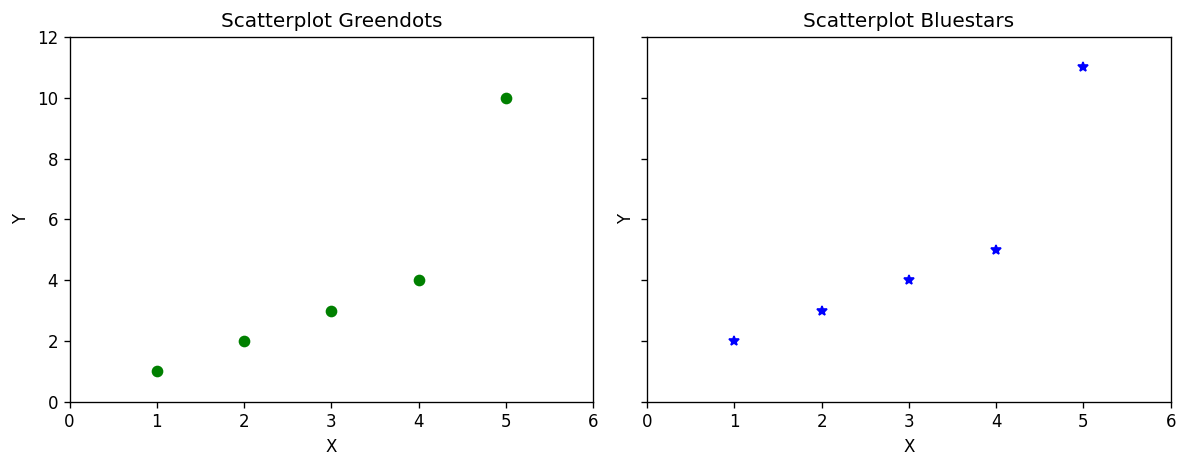

In [8]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot([1,2,3,4,5], [1,2,3,4,10], 'go')  # greendots
ax2.plot([1,2,3,4,5], [2,3,4,5,11], 'b*')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set(title='Scatterplot Greendots', xlabel='X', ylabel='Y', xlim=(0,6), ylim=(0,12))
ax2.set(title='Scatterplot Bluestars', xlabel='X', ylabel='Y', xlim=(0,6), ylim=(0,12))

plt.tight_layout()
plt.show()

<a href='#top'>jump to the top</a>

# 3.4 Object Oriented Syntax vs Matlab like Syntax<a id='section4'></a>

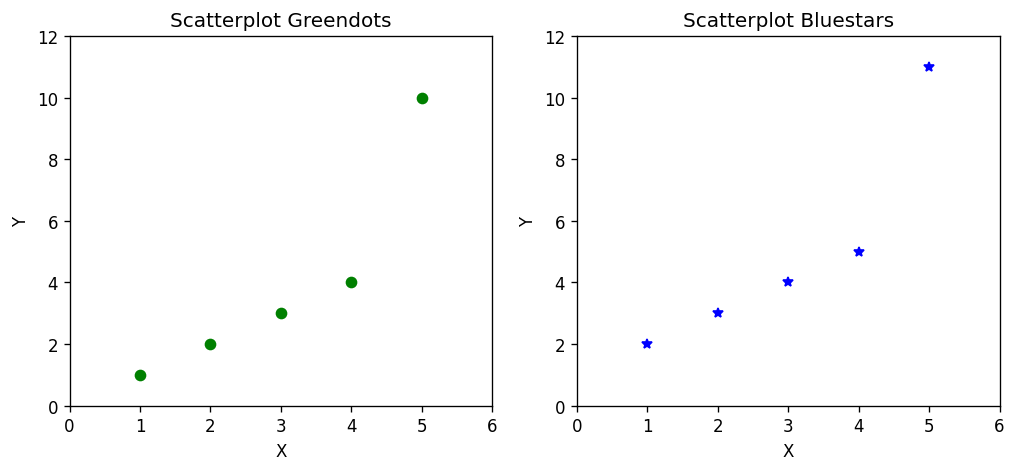

In [9]:
## Matlab like syntax
plt.figure(figsize=(10,4), dpi=120) # 10 is width, 4 is height

# Left hand side plot
plt.subplot(1,2,1)  # (nRows, nColumns, axes number to plot)
plt.plot([1,2,3,4,5], [1,2,3,4,10], 'go')  # green dots
plt.title('Scatterplot Greendots')  
plt.xlabel('X'); plt.ylabel('Y')
plt.xlim(0, 6); plt.ylim(0, 12)

# Right hand side plot
plt.subplot(1,2,2)
plt.plot([1,2,3,4,5], [2,3,4,5,11], 'b*')  # blue stars
plt.title('Scatterplot Bluestars')  
plt.xlabel('X'); plt.ylabel('Y')
plt.xlim(0, 6); plt.ylim(0, 12)
plt.show()

Let’s breakdown the above piece of code.

In `plt.subplot(1,2,1)`, the first two values, that is (1,2) specifies the number of rows (1) and columns (2) and the third parameter (1) specifies the position of current subplot. The subsequent `plt` functions, will always draw on this current subplot.

You can get a reference to the current (subplot) axes with `plt.gca()` and the current figure with `plt.gcf()`. Likewise, `plt.cla()` and `plt.clf()` will clear the current axes and figure respectively.

Alright, compare the above code with the object oriented (OO) version. The OO version might look a but confusing because it has a mix of both ax1 and plt commands.

However, there is a significant advantage with axes approach.

That is, since `plt.subplots` returns all the axes as separate objects, you can avoid writing repetitive code by looping through the axes.

Always remember: `plt.plot()` or `plt.{anything}` will always act on the plot in the current axes, whereas, `ax.{anything}` will modify the plot inside that specific ax.

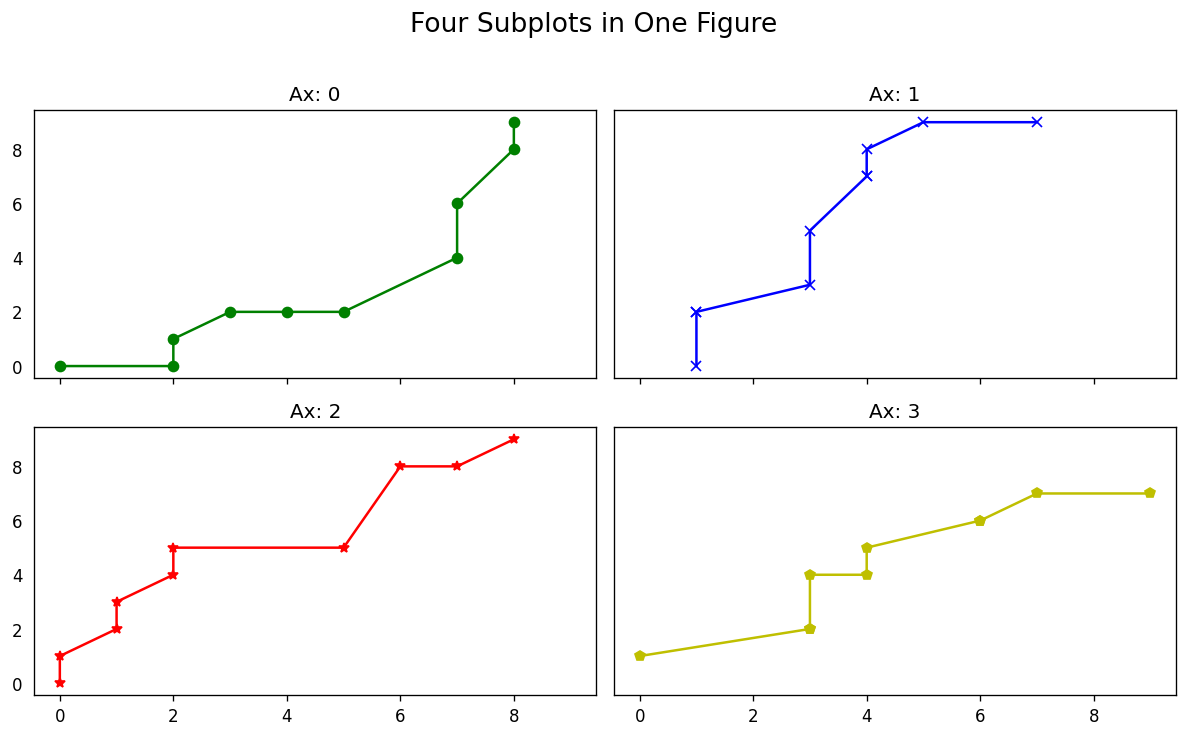

In [10]:
# Draw multiple plots using for-loops using object oriented syntax
import numpy as np
from numpy.random import seed, randint
seed(100)

# Create Figure and Subplots
fig, axes = plt.subplots(2,2, figsize=(10,6), sharex=True, sharey=True, dpi=120)

# Define the colors and markers to use
colors = {0:'g', 1:'b', 2:'r', 3:'y'}
markers = {0:'o', 1:'x', 2:'*', 3:'p'}

# Plot each axes
for i, ax in enumerate(axes.ravel()):
    ax.plot(sorted(randint(0,10,10)), sorted(randint(0,10,10)), marker=markers[i], color=colors[i])  
    ax.set_title('Ax: ' + str(i))
    ax.yaxis.set_ticks_position('none')

plt.suptitle('Four Subplots in One Figure', verticalalignment='bottom', fontsize=16)    
plt.tight_layout()
plt.show()

Did you notice in above plot, the Y-axis does not have ticks?

That’s because I used `ax.yaxis.set_ticks_position('none')` to turn off the Y-axis ticks. This is another advantage of the object-oriented interface. You can actually get a reference to any specific element of the plot and use its methods to manipulate it.

The `plt.suptitle()` added a main title at figure level title. `plt.title()` would have done the same for the current subplot (axes).

The `verticalalignment='bottom'` parameter denotes the hingepoint should be at the bottom of the title text, so that the main title is pushed slightly upwards.

<a href='#top'>jump to the top</a>

# 3.5 Modify the Axis Ticks Positions and Labels<a id='section5'></a>

There are 3 basic things you will probably ever need in matplotlib when it comes to manipulating axis ticks:
1. How to control the position and tick labels? (using `plt.xticks()` or `ax.setxticks()` and `ax.setxticklabels()`)
2. How to control which axis’s ticks (top/bottom/left/right) should be displayed (using `plt.tick_params()`)
3. Functional formatting of tick labels

If you are using ax syntax, you can use `ax.set_xticks()` and `ax.set_xticklabels()` to set the positions and label texts respectively. If you are using the plt syntax, you can set both the positions as well as the label text in one call using the `plt.xticks()`.

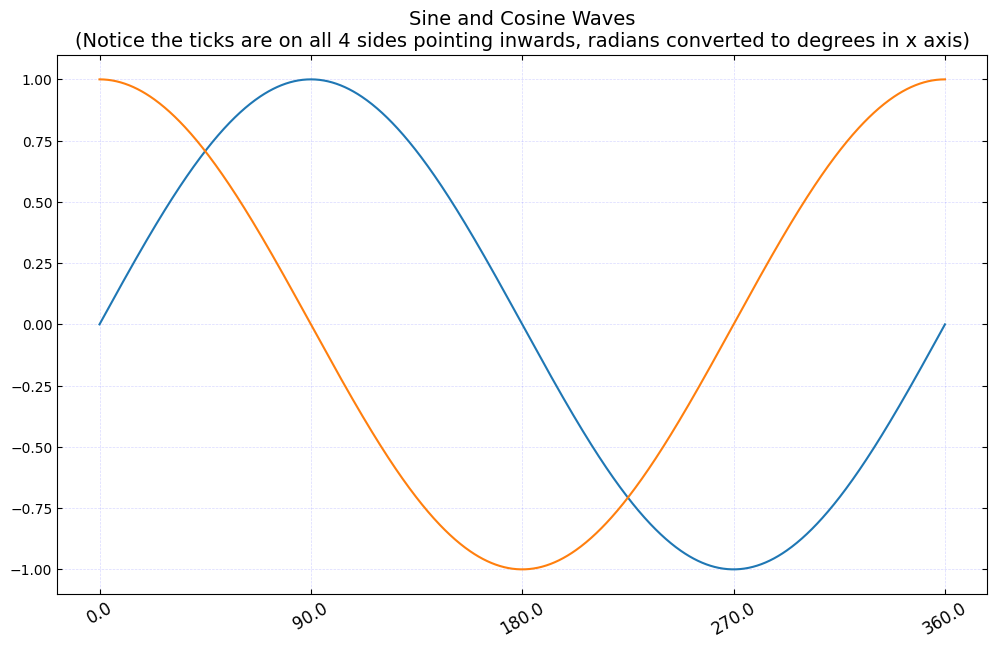

In [11]:
"""
This code demonstrate how to create a plot that the unit of x axis is in degree instead of radian.
"""
from matplotlib.ticker import FuncFormatter

def rad_to_degrees(x, pos):
    'converts radians to degrees'
    return round(x * 57.2985, 2)

plt.figure(figsize=(12,7), dpi=100)
X = np.linspace(0,2*np.pi,1000) # this line generates an array of 1000 evenly spaced values, between 0 and 2*pi.

# Again, plot 2 lines on the same plot
plt.plot(X,np.sin(X)) # Because sin(X) and X is bijective, this y-axis has the same number of points as x-axis.
plt.plot(X,np.cos(X))

# 1. Adjust x axis Ticks. Ticks is the big numbers on the axis.
# ticks: specifies the tick position.
# fontsize, rotation, ha, va: specifies the font size, rotation angle, horizontal alignment, and vertical alignment of the tick labels.
plt.xticks(ticks=np.arange(0, 440/57.2985, 90/57.2985), fontsize=12, rotation=30, ha='center', va='top')  # 1 radian = 57.2985 degrees

# 2. Tick Parameters
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='blue')

# 3. Format tick labels to convert radians to degrees
formatter = FuncFormatter(rad_to_degrees)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(linestyle='--', linewidth=0.5, alpha=0.15)
plt.title('Sine and Cosine Waves\n(Notice the ticks are on all 4 sides pointing inwards, radians converted to degrees in x axis)', fontsize=14)
plt.show()

In above code, `plt.tick_params()` is used to determine which all axis of the plot (‘top’ / ‘bottom’ / ‘left’ / ‘right’) you want to draw the ticks and which direction (‘in’ / ‘out’) the tick should point to.

the `matplotlib.ticker` module provides the FuncFormatter to determine how the final tick label should be shown.

<a href='#top'>jump to the top</a>

# 3.6 Understanding the Plot Styles<a id='section6'></a>

The look and feel of various components of a matplotlib plot can be set globally using `rcParams`. The complete list of `rcParams` can be viewed by typing:

In [12]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


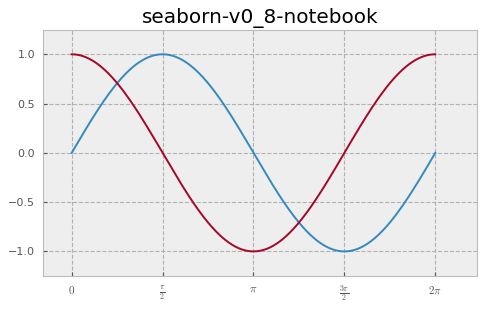

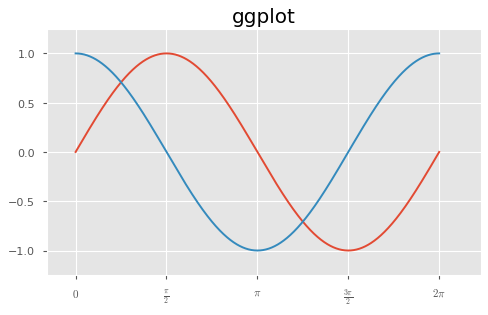

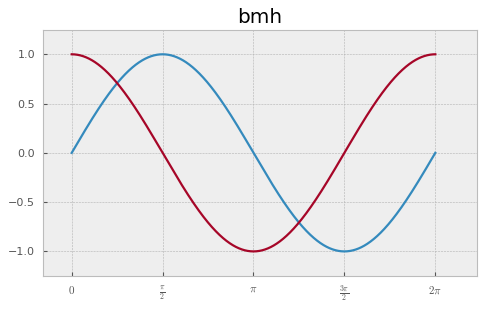

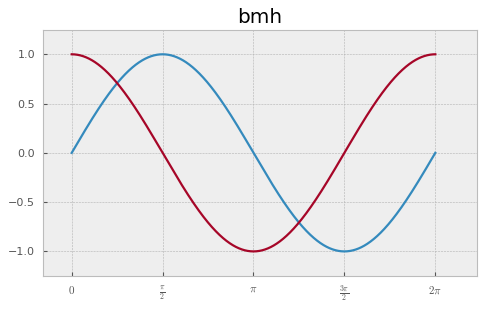

In [19]:
def plot_sine_cosine_wave(style='ggplot'):
    plt.style.use(style)
    plt.figure(figsize=(7,4), dpi=80)
    X = np.linspace(0,2*np.pi,1000)
    plt.plot(X,np.sin(X)); plt.plot(X,np.cos(X))
    plt.xticks(ticks=np.arange(0, 440/57.2985, 90/57.2985), labels = [r'$0$',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'])  # 1 radian = 57.2985 degrees
    plt.gca().set(ylim=(-1.25, 1.25), xlim=(-.5, 7))
    plt.title(style, fontsize=18)
    plt.show()

# the list of available printing styles could be found on:
a = mpl.style.available
print(a)

plot_sine_cosine_wave('seaborn-v0_8-notebook')
plot_sine_cosine_wave('ggplot')    
plot_sine_cosine_wave('bmh')
plot_sine_cosine_wave('bmh')

<a href='#top'>jump to the top</a>

# 3.7 Customise the Legend<a id='section7'></a>

The most common way to make a legend is to define the label parameter for each of the plots and finally call `plt.legend()`.

However, sometimes you might want to construct the legend on your own. In that case, you need to pass the plot items you want to draw the legend for and the legend text as parameters to `plt.legend()` in the following format:

`plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))`

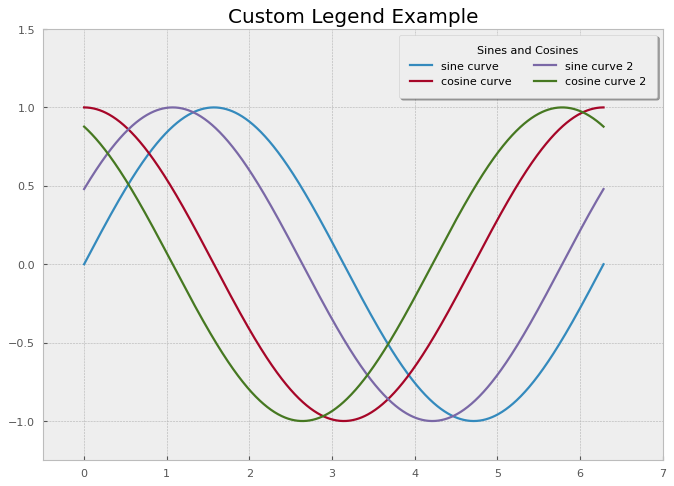

In [20]:
plt.figure(figsize=(10,7), dpi=80)
X = np.linspace(0, 2*np.pi, 1000)
sine = plt.plot(X,np.sin(X)); cosine = plt.plot(X,np.cos(X))
sine_2 = plt.plot(X,np.sin(X+.5)); cosine_2 = plt.plot(X,np.cos(X+.5))
plt.gca().set(ylim=(-1.25, 1.5), xlim=(-.5, 7)) 
# gca() stands for get current axes.
# Using plt.gca() instead of plt.xlim() and plt.ylim() is because setting them individually might not work as expected when dealing with multiple axes. 
plt.title('Custom Legend Example', fontsize=18)

# Modify legend
plt.legend([sine[0], cosine[0], sine_2[0], cosine_2[0]],   # plot items
           ['sine curve', 'cosine curve', 'sine curve 2', 'cosine curve 2'],  
           frameon=True,                                   # legend border
           framealpha=1,                                   # transparency of border
           ncol=2,                                         # num columns
           shadow=True,                                    # shadow on
           borderpad=1,                                    # thickness of border
           title='Sines and Cosines')                      # title
plt.show()

<a href='#top'>jump to the top</a>

# 3.10 Scatterplot drawn from `plt.scatter` <a id='section10'></a>

The difference is `plt.plot()` does not provide options to change the color and size of point dynamically (based on another array). But `plt.scatter()` allows you to do that.

By varying the size and color of points, you can create nice looking bubble plots.

Another convenience is you can directly use a pandas dataframe to set the x and y values, provided you specify the source dataframe in the `data` argument.

You can also set the color `'c'` and size `'s'` of the points from one of the dataframe columns itself.

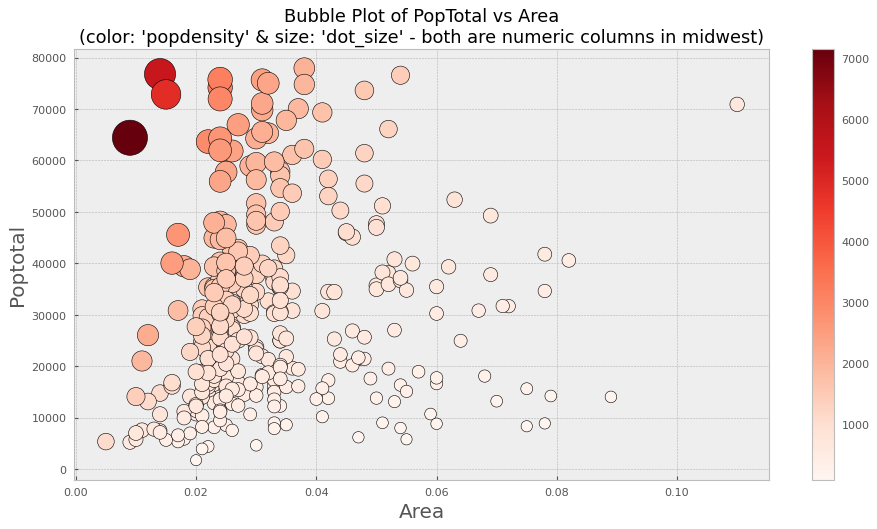

In [21]:
# Scatterplot with varying size and color of points
import pandas as pd
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Plot
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('area', 'poptotal', data=midwest, s='dot_size', c='popdensity', cmap='Reds', edgecolors='black', linewidths=.5)
# 'area' and 'poptotal' are column names in midwest dataframe.
# specifies the size of each point in the scatterplot.
# c = 'popdensity': specifies the color of each point in the scatterplot.
plt.title("Bubble Plot of PopTotal vs Area\n(color: 'popdensity' & size: 'dot_size' - both are numeric columns in midwest)", fontsize=16)
plt.xlabel('Area', fontsize=18)
plt.ylabel('Poptotal', fontsize=18)
plt.colorbar()
plt.show() 

<Figure size 800x550 with 0 Axes>

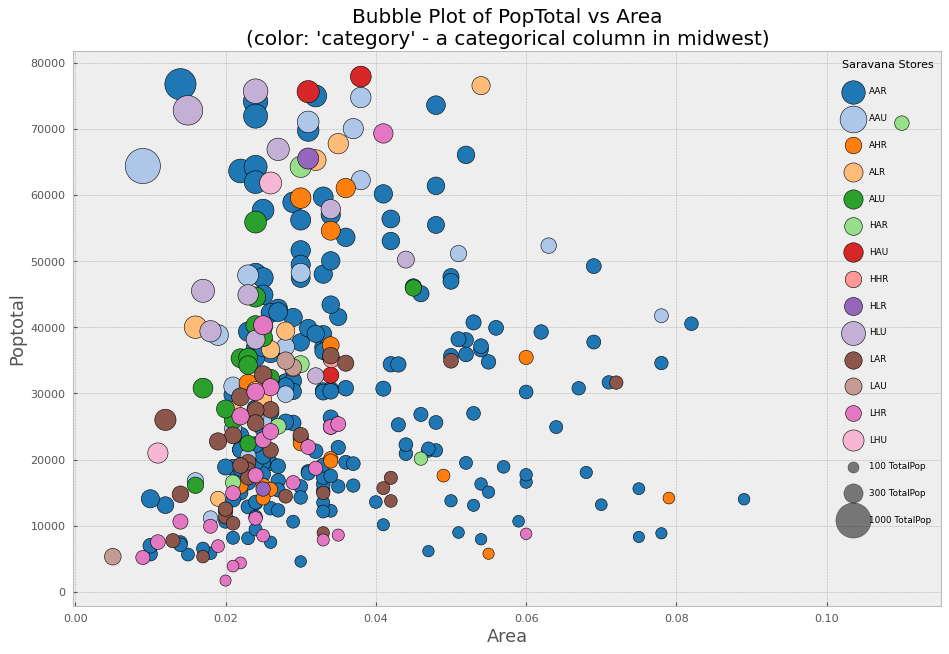

In [24]:
# Import data
import pandas as pd
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Plot
fig = plt.figure(figsize=(14, 9), dpi= 80, facecolor='w', edgecolor='k')    
colors = plt.cm.tab20.colors
categories = np.unique(midwest['category']) # this is the third column of the dataset.
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', color=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Legend for size of points
for dot_size in [100, 300, 1000]:
    plt.scatter([], [], c='k', alpha=0.5, s=dot_size, label=str(dot_size) + ' TotalPop')
plt.legend(loc='upper right', scatterpoints=1, frameon=False, labelspacing=2, title='Saravana Stores', fontsize=8)
plt.title("Bubble Plot of PopTotal vs Area\n(color: 'category' - a categorical column in midwest)", fontsize=18)
plt.xlabel('Area', fontsize=16)
plt.ylabel('Poptotal', fontsize=16)
plt.show()

In [25]:
# Save the figure
plt.savefig("bubbleplot.png", transparent=True, dpi=120)

<a href='#top'>jump to the top</a>

# 3.11 Draw Histograms, Boxplots and Time Series<a id='section11'></a>

<Figure size 800x550 with 0 Axes>

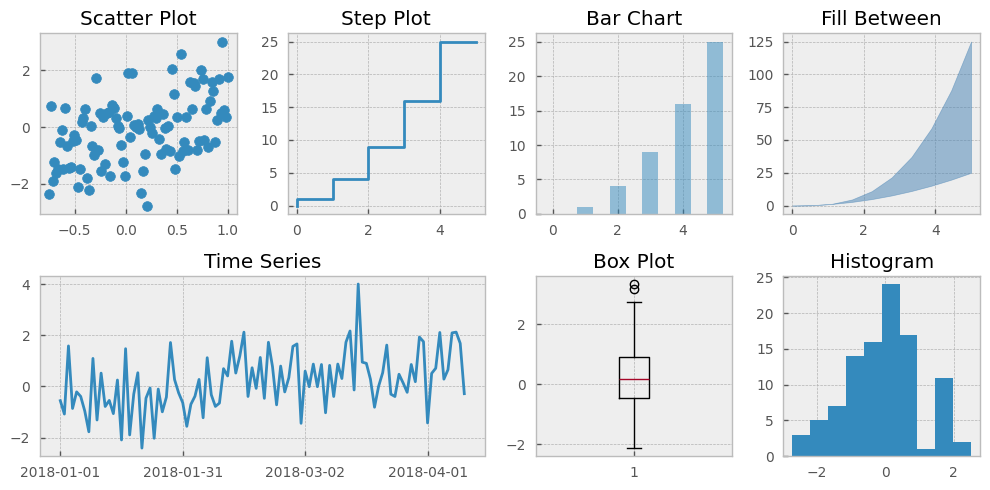

In [26]:
import pandas as pd

# Setup the subplot2grid Layout
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((2,4), (0,0)) 
ax2 = plt.subplot2grid((2,4), (0,1)) 
ax3 = plt.subplot2grid((2,4), (0,2)) 
ax4 = plt.subplot2grid((2,4), (0,3)) 
ax5 = plt.subplot2grid((2,4), (1,0), colspan=2) 
ax6 = plt.subplot2grid((2,4), (1,2)) 
ax7 = plt.subplot2grid((2,4), (1,3)) 

# Input Arrays
n = np.array([0,1,2,3,4,5])
x = np.linspace(0,5,10)
xx = np.linspace(-0.75, 1., 100)

# Scatterplot
ax1.scatter(xx, xx + np.random.randn(len(xx)))
ax1.set_title("Scatter Plot")

# Step Chart
ax2.step(n, n**2, lw=2)
ax2.set_title("Step Plot")

# Bar Chart
ax3.bar(n, n**2, align="center", width=0.5, alpha=0.5)
ax3.set_title("Bar Chart")

# Fill Between
ax4.fill_between(x, x**2, x**3, color="steelblue", alpha=0.5);
ax4.set_title("Fill Between");

# Time Series
dates = pd.date_range('2018-01-01', periods = len(xx))
ax5.plot(dates, xx + np.random.randn(len(xx)))
ax5.set_xticks(dates[::30])
ax5.set_xticklabels(dates.strftime('%Y-%m-%d')[::30])
ax5.set_title("Time Series")

# Box Plot
ax6.boxplot(np.random.randn(len(xx)))
ax6.set_title("Box Plot")

# Histogram
ax7.hist(xx + np.random.randn(len(xx)))
ax7.set_title("Histogram")

fig.tight_layout()
plt.show()

<a href='#top'>jump to the top</a>